In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('mushrooms week 15 casestudy.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preprocessing

In [3]:
data.shape

(8124, 23)

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#there is no null values

In [7]:
#label encoding

In [8]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])


In [9]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:>

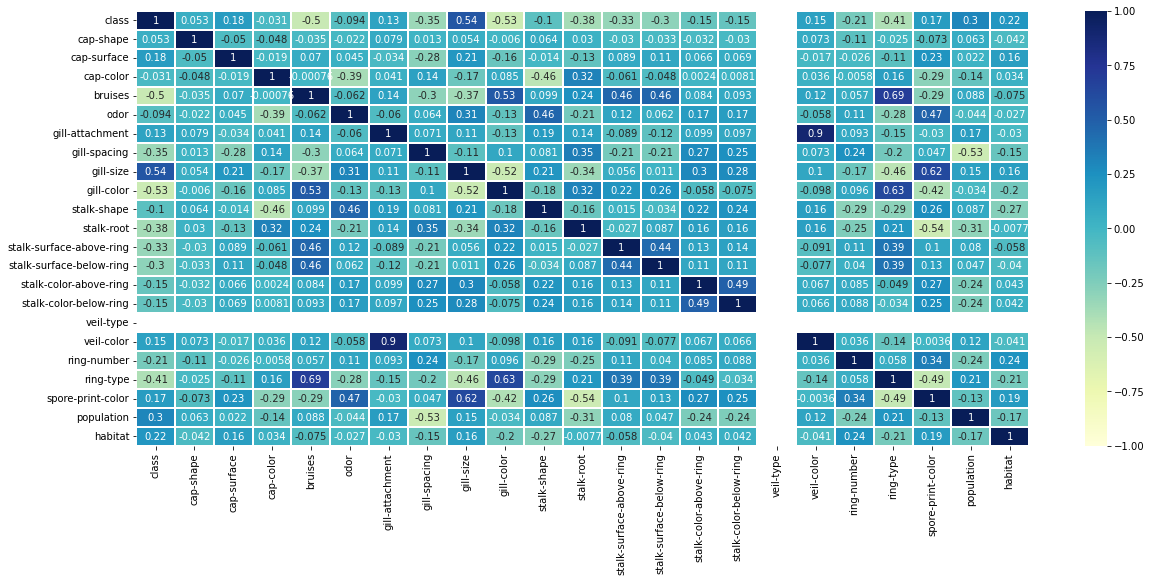

In [10]:
#plotting heatmap
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

veil type is zero and veil colour has high corrilation with gill-attachment.
so we can drop veil colour and veil type

In [11]:
data= data.drop(['veil-type','veil-color'],axis=1)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,3,2,2,7,7,1,0,3,0,1


In [12]:
data.shape

(8124, 21)

In [13]:
#splitting data
x=data.drop(['class'],axis=1)
y= data['class']

In [14]:
#standard scaling
from sklearn import preprocessing
standadisation=preprocessing.StandardScaler()
x=standadisation.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


# Model selection

In [15]:
#training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.2)

In [16]:
#fitting with different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [17]:
models=  {'RandomForestClassifier':RandomForestClassifier(),
          'LogisticRegression':LogisticRegression(),
          'KNeighborsClassifier':KNeighborsClassifier(),
          'SVC':SVC(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'BernoulliNB':BernoulliNB(),
          'GaussianNB':GaussianNB()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')




RandomForestClassifier  trained
LogisticRegression  trained
KNeighborsClassifier  trained
SVC  trained
DecisionTreeClassifier  trained
BernoulliNB  trained
GaussianNB  trained


In [18]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [19]:
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(x_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'SVM':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[4],
                  'BernolliNB':model_conf_mat[5],
                  'GaussianNB':model_conf_mat[6],
                 }
confusion_matrix

{'Random Forest': array([[843,   0],
        [  0, 782]], dtype=int64),
 'Logistic regression': array([[794,  49],
        [ 49, 733]], dtype=int64),
 'KNN': array([[843,   0],
        [  0, 782]], dtype=int64),
 'SVM': array([[843,   0],
        [  0, 782]], dtype=int64),
 'DecisionTree': array([[843,   0],
        [  0, 782]], dtype=int64),
 'BernolliNB': array([[817,  26],
        [145, 637]], dtype=int64),
 'GaussianNB': array([[808,  35],
        [ 89, 693]], dtype=int64)}

In [20]:
Models = ['Random Forest','Logistic regression','KNN','SVM','DecisionTree','BernolliNB','GaussianNB']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
    })
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,1.000000,1.000000,1.000000,1.000000
1,Logistic regression,0.939692,0.939692,0.939692,0.939692
2,KNN,1.000000,1.000000,1.000000,1.000000
3,SVM,1.000000,1.000000,1.000000,1.000000
4,DecisionTree,1.000000,1.000000,1.000000,1.000000
5,BernolliNB,0.894769,0.893905,0.894769,0.902935
6,GaussianNB,0.923692,0.923512,0.923692,0.925392


here KNN, SVM,Decision tree,random forest gives 100% accuracy